<a href="https://colab.research.google.com/github/Vini901/Supervised-Machine-Learning/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data=pd.read_csv('/content/drive/MyDrive/Copy of SeoulBikeData.csv',encoding='latin')

In [5]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
data['Hour']=data['Hour'].astype('category')

In [7]:
print('The Number of rows = '+str(data.shape[0]))
print('The Number of columns = '+str(data.shape[1]))

The Number of rows = 8760
The Number of columns = 14


In [8]:
data.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [9]:
#missing value counts in each of these columns
miss = data.isnull().sum()/len(data)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

Series([], dtype: float64)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


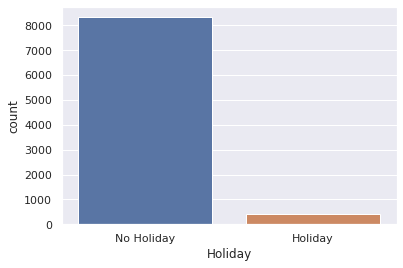

In [10]:
sns.countplot(data['Holiday'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


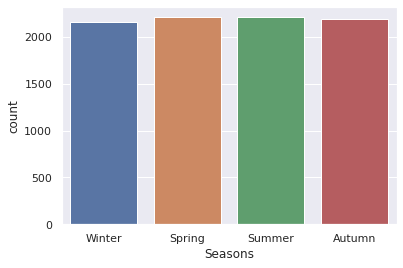

In [11]:
sns.countplot(data['Seasons'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


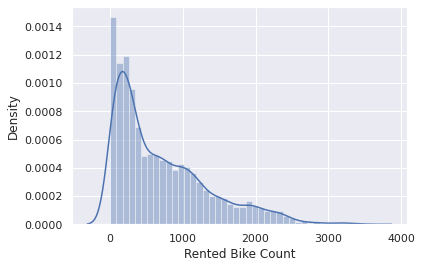

In [12]:
sns.distplot(data['Rented Bike Count'])

In [13]:
print(data['Rented Bike Count'].skew())

1.1534281773679014


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


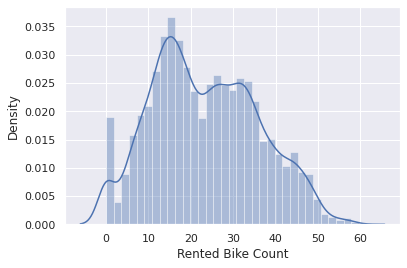

In [14]:
sns.distplot(np.sqrt(data['Rented Bike Count']))

In [15]:
print(np.sqrt(data['Rented Bike Count']).skew())

0.237362090985412


In [16]:
data['mod Rented Bike Count']=np.sqrt(data['Rented Bike Count'])

In [17]:
data[data['Rented Bike Count']==2047]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,mod Rented Bike Count
4361,31/05/2018,2047,17,27.2,42,2.9,1828,13.1,1.79,0.0,0.0,Spring,No Holiday,Yes,45.243784


In [18]:
data[data['Rented Bike Count']==3556]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,mod Rented Bike Count
4818,19/06/2018,3556,18,24.1,57,2.9,1301,15.0,0.56,0.0,0.0,Summer,No Holiday,Yes,59.632206


In [19]:
data[data['Rented Bike Count']==504]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,mod Rented Bike Count
688,29/12/2017,504,16,5.4,56,2.2,396,-2.6,0.39,0.0,0.0,Winter,No Holiday,Yes,22.449944
2292,06/03/2018,504,12,8.5,34,1.9,1876,-6.4,2.55,0.0,0.0,Spring,No Holiday,Yes,22.449944
2773,26/03/2018,504,13,16.0,47,2.5,459,4.6,2.80,0.0,0.0,Spring,No Holiday,Yes,22.449944
3168,12/04/2018,504,0,9.5,40,2.4,1987,-3.4,0.00,0.0,0.0,Spring,No Holiday,Yes,22.449944
6747,08/09/2018,504,3,17.8,60,0.2,2000,9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes,22.449944
7638,15/10/2018,504,6,11.2,81,0.2,1071,8.0,0.00,0.0,0.0,Autumn,No Holiday,Yes,22.449944


In [20]:
data.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,mod Rented Bike Count
count,8760,8760.000000,8760.0,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760,8760.000000
unique,365,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2,NaN
top,15/12/2017,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes,NaN
freq,24,NaN,365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465,NaN
mean,NaN,704.602055,NaN,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN,23.443395
std,NaN,644.997468,NaN,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN,12.450984
min,NaN,0.000000,NaN,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,191.000000,NaN,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN,13.820275
50%,NaN,504.500000,NaN,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN,22.461075
75%,NaN,1065.250000,NaN,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN,32.638167


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


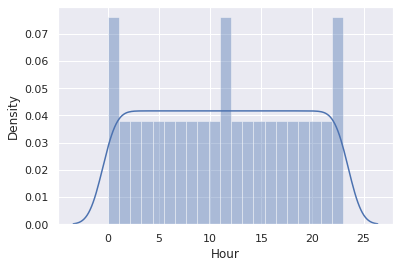

In [21]:
sns.distplot(data['Hour'])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Date                       8760 non-null   object  
 1   Rented Bike Count          8760 non-null   int64   
 2   Hour                       8760 non-null   category
 3   Temperature(°C)            8760 non-null   float64 
 4   Humidity(%)                8760 non-null   int64   
 5   Wind speed (m/s)           8760 non-null   float64 
 6   Visibility (10m)           8760 non-null   int64   
 7   Dew point temperature(°C)  8760 non-null   float64 
 8   Solar Radiation (MJ/m2)    8760 non-null   float64 
 9   Rainfall(mm)               8760 non-null   float64 
 10  Snowfall (cm)              8760 non-null   float64 
 11  Seasons                    8760 non-null   object  
 12  Holiday                    8760 non-null   object  
 13  Functioning Day            8760 n

In [23]:
new_count=data.groupby(['Date'],as_index=False).agg({'Rented Bike Count':sum})
new_count.shape

(365, 2)

In [24]:
duplicate = data[data.duplicated()] 
  
print("Duplicate Rows :") 

Duplicate Rows :


In [25]:
data['Date'].loc[0][-4:]

'2017'

In [26]:
data['year']=data.Date.apply(lambda x:x[-4:])

In [27]:
data['year'].value_counts()

2018    8016
2017     744
Name: year, dtype: int64

In [28]:
data.sort_values(by='Date')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,mod Rented Bike Count,year
744,01/01/2018,206,0,-3.2,40,0.5,1358,-14.9,0.0,0.0,0.0,Winter,Holiday,Yes,14.352700,2018
767,01/01/2018,154,23,-1.6,51,0.7,1882,-10.4,0.0,0.0,0.0,Winter,Holiday,Yes,12.409674,2018
766,01/01/2018,168,22,-1.3,48,0.8,1927,-10.9,0.0,0.0,0.0,Winter,Holiday,Yes,12.961481,2018
765,01/01/2018,203,21,-0.9,44,1.2,1871,-11.6,0.0,0.0,0.0,Winter,Holiday,Yes,14.247807,2018
764,01/01/2018,206,20,-0.3,40,1.2,1936,-12.2,0.0,0.0,0.0,Winter,Holiday,Yes,14.352700,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,31/12/2017,32,4,-0.2,87,3.5,246,-2.1,0.0,0.0,1.2,Winter,Holiday,Yes,5.656854,2017
723,31/12/2017,65,3,0.3,91,2.0,172,-1.0,0.0,1.0,1.2,Winter,Holiday,Yes,8.062258,2017
722,31/12/2017,65,2,0.4,95,1.7,110,-0.3,0.0,0.0,1.2,Winter,Holiday,Yes,8.062258,2017
732,31/12/2017,209,12,1.4,47,4.5,1388,-8.7,1.1,0.0,1.0,Winter,Holiday,Yes,14.456832,2017


In [29]:
data['Visibility (10m)'].value_counts()

2000    2245
1995      34
1999      28
1985      28
1989      28
        ... 
731        1
739        1
795        1
851        1
72         1
Name: Visibility (10m), Length: 1789, dtype: int64

In [30]:
data[data['Snowfall (cm)']==8.8]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,mod Rented Bike Count,year
8602,24/11/2018,62,10,0.4,97,1.8,207,0.0,0.00,0.0,8.8,Autumn,No Holiday,Yes,7.874008,2018
8603,24/11/2018,114,11,1.2,97,2.3,975,0.7,0.07,0.0,8.8,Autumn,No Holiday,Yes,10.677078,2018


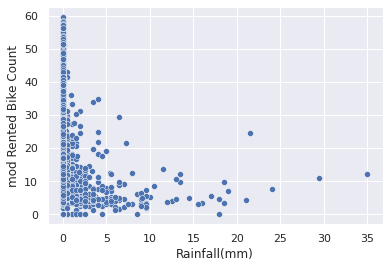

In [31]:
sns.scatterplot(x=data['Rainfall(mm)'],y=data['mod Rented Bike Count'])

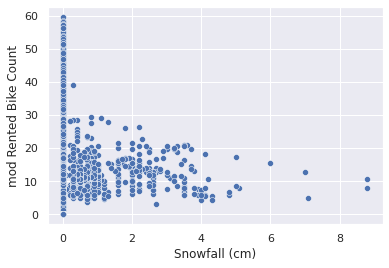

In [32]:
sns.scatterplot(x=data['Snowfall (cm)'],y=data['mod Rented Bike Count'])

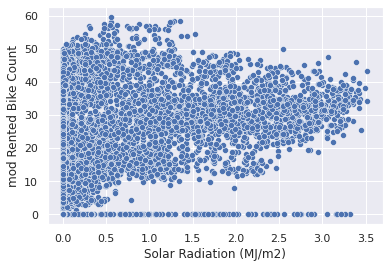

In [33]:
sns.scatterplot(x=data['Solar Radiation (MJ/m2)'],y=data['mod Rented Bike Count'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


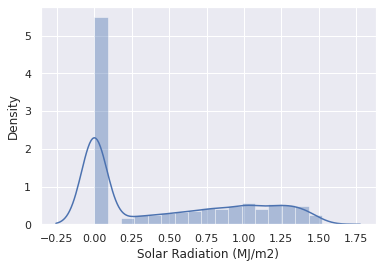

In [34]:
sns.distplot(np.cbrt(data['Solar Radiation (MJ/m2)']))

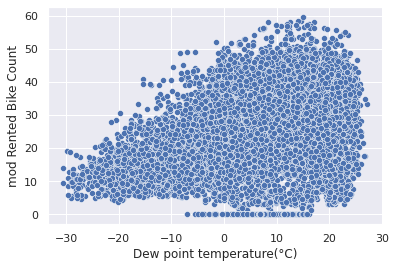

In [35]:
sns.scatterplot(x=data['Dew point temperature(°C)'],y=data['mod Rented Bike Count'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


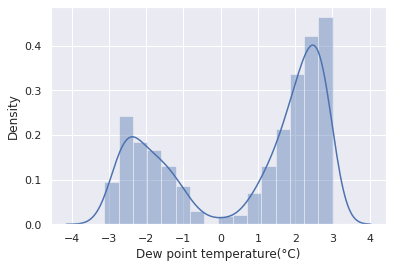

In [36]:
sns.distplot(np.cbrt(data['Dew point temperature(°C)']))

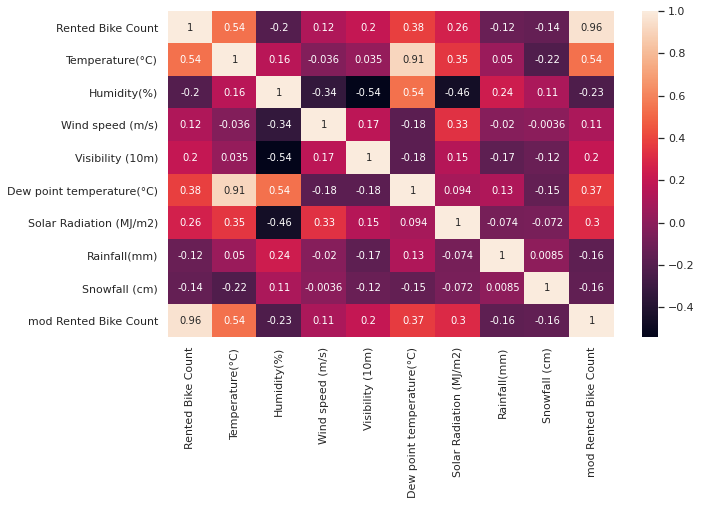

In [37]:
plt.rcParams['figure.figsize']=(10,6)
sns.heatmap(data.corr(),annot=True)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Date                       8760 non-null   object  
 1   Rented Bike Count          8760 non-null   int64   
 2   Hour                       8760 non-null   category
 3   Temperature(°C)            8760 non-null   float64 
 4   Humidity(%)                8760 non-null   int64   
 5   Wind speed (m/s)           8760 non-null   float64 
 6   Visibility (10m)           8760 non-null   int64   
 7   Dew point temperature(°C)  8760 non-null   float64 
 8   Solar Radiation (MJ/m2)    8760 non-null   float64 
 9   Rainfall(mm)               8760 non-null   float64 
 10  Snowfall (cm)              8760 non-null   float64 
 11  Seasons                    8760 non-null   object  
 12  Holiday                    8760 non-null   object  
 13  Functioning Day            8760 n

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


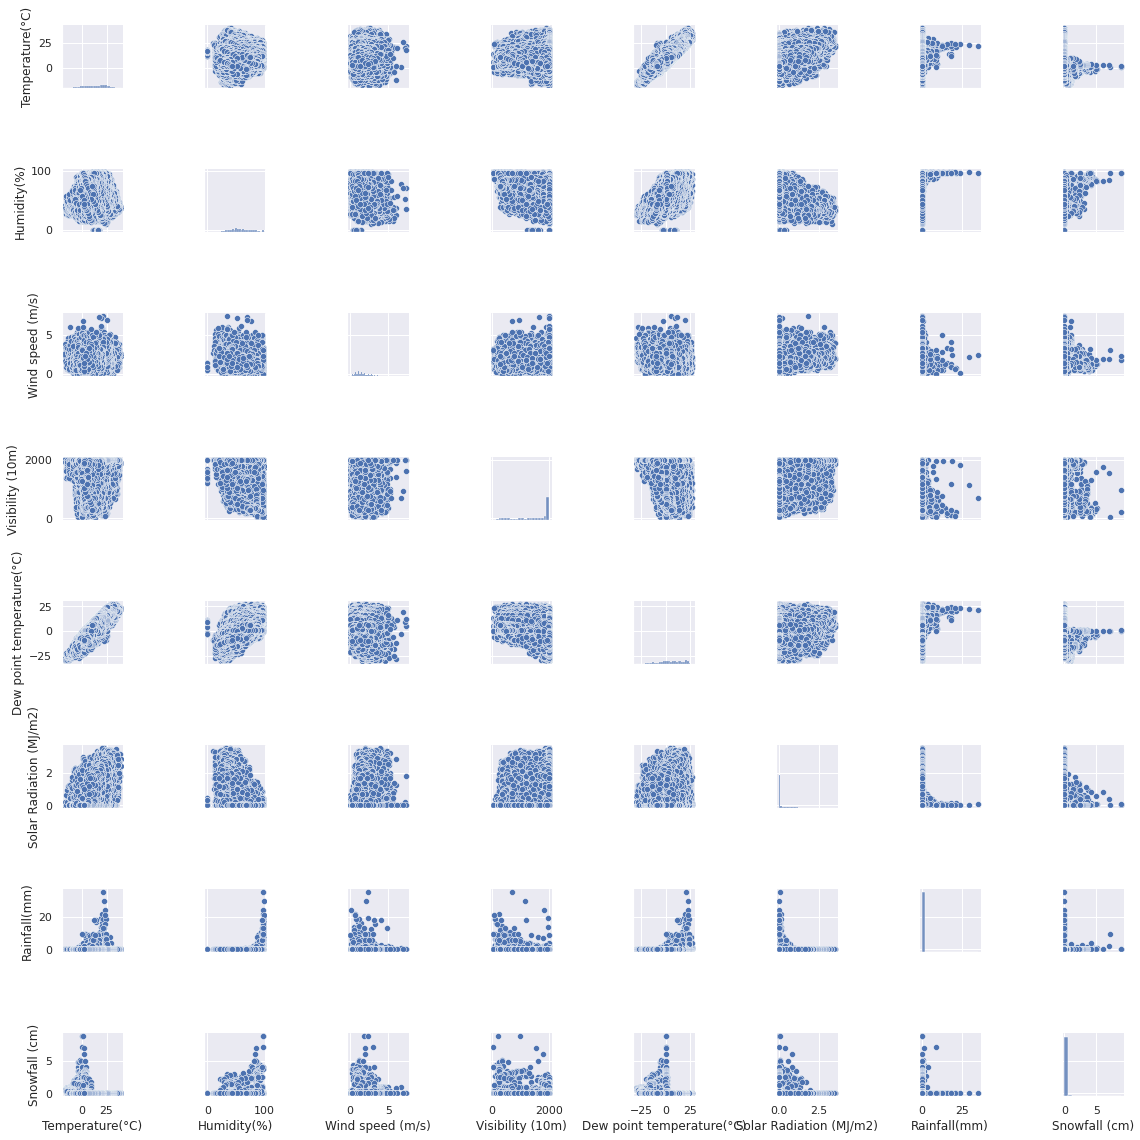

In [39]:
sns.pairplot(data[['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']],size=2)

In [40]:
'''def mod_hour(x):
  if x>=0 and x<6:
    return '1'
  elif x>=6 and x<12:
    return '2'
  elif x>=12 and x<18:
    return '3'
  elif x>=18 and x<24:
    return '4' '''#earlier applied

"def mod_hour(x):\n  if x>=0 and x<6:\n    return '1'\n  elif x>=6 and x<12:\n    return '2'\n  elif x>=12 and x<18:\n    return '3'\n  elif x>=18 and x<24:\n    return '4' "

In [41]:
# data.head()

In [42]:
# data['Holiday']=data.Holiday.apply(lambda x : 0 if x=='No Holiday' else 1)

In [43]:
# data['Holiday'].unique()

In [44]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,mod Rented Bike Count,year
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,15.937377,2017
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,14.282857,2017
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,13.152946,2017
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,10.344080,2017
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,8.831761,2017


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


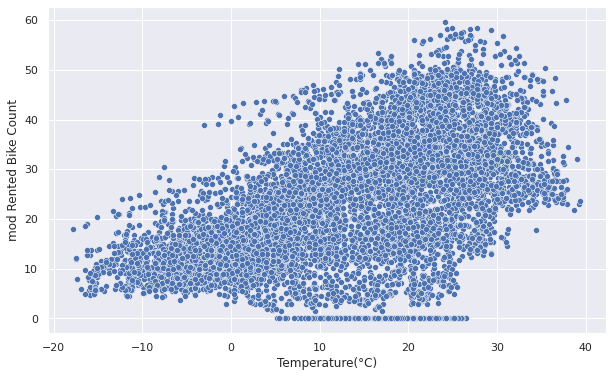

In [45]:
sns.scatterplot(data['Temperature(°C)'],data['mod Rented Bike Count'])

0= No holiday
1=Holiday

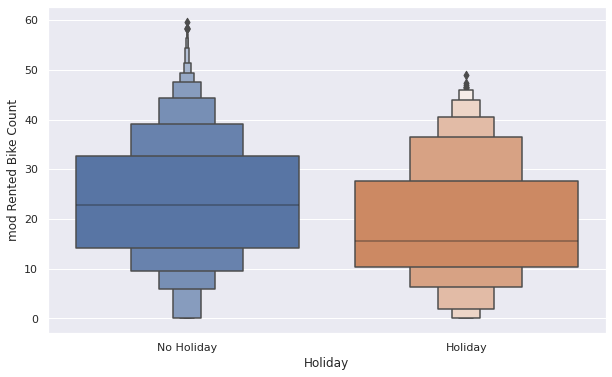

In [46]:
sns.boxenplot(data=data,x='Holiday',y='mod Rented Bike Count')

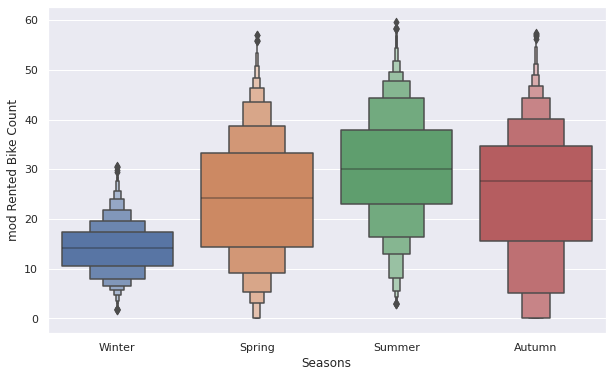

In [47]:
sns.boxenplot(data=data,x='Seasons',y='mod Rented Bike Count')

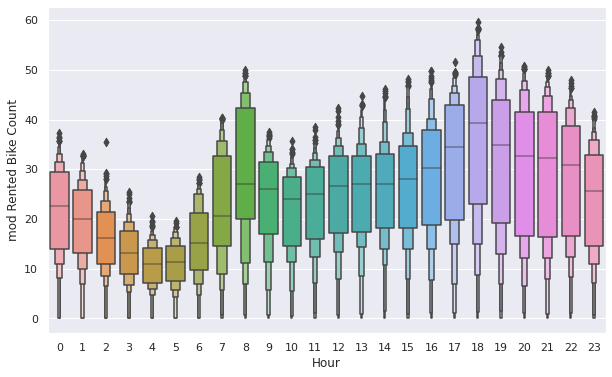

In [48]:
sns.boxenplot(data=data,x='Hour',y='mod Rented Bike Count')

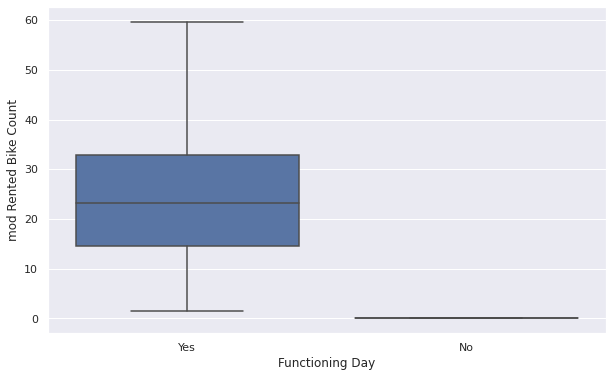

In [49]:
sns.boxplot(data=data,x='Functioning Day',y='mod Rented Bike Count')

In [50]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,mod Rented Bike Count,year
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,15.937377,2017
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,14.282857,2017
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,13.152946,2017
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,10.344080,2017
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,8.831761,2017


In [51]:
data.drop(['Dew point temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','year','Functioning Day'],axis=1,inplace=True)

In [52]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Seasons,Holiday,mod Rented Bike Count
0,01/12/2017,254,0,-5.2,Winter,No Holiday,15.937377
1,01/12/2017,204,1,-5.5,Winter,No Holiday,14.282857
2,01/12/2017,173,2,-6.0,Winter,No Holiday,13.152946
3,01/12/2017,107,3,-6.2,Winter,No Holiday,10.344080
4,01/12/2017,78,4,-6.0,Winter,No Holiday,8.831761


Taking Hour as catergorical variable for all hours of day and Holiday as catergorical variable too (season)
While Temprature which is giving is surge in bike count with increase in temperature

In [53]:
del data['Date']

In [54]:
y=data['mod Rented Bike Count']
x=data.drop('mod Rented Bike Count',axis=1)

In [55]:
x=pd.get_dummies(x)

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
from sklearn.preprocessing import MinMaxScaler

In [58]:
# Transforming data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [59]:
Regress=LinearRegression()
Regress.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
Regress.coef_

array([ 6.57880989e+01, -1.32932755e+00, -1.85135817e+11, -1.85135817e+11,
       -1.85135817e+11, -1.85135817e+11, -1.85135817e+11, -1.85135817e+11,
       -1.85135817e+11, -1.85135817e+11, -1.85135817e+11, -1.85135817e+11,
       -1.85135817e+11, -1.85135817e+11, -1.85135817e+11, -1.85135817e+11,
       -1.85135817e+11, -1.85135817e+11, -1.85135817e+11, -1.85135817e+11,
       -1.85135817e+11, -1.85135817e+11, -1.85135817e+11, -1.85135817e+11,
       -1.85135817e+11, -1.85135817e+11,  3.66008059e+12,  3.66008059e+12,
        3.66008059e+12,  3.66008059e+12, -2.62470572e+11, -2.62470572e+11])

In [61]:
Regress.intercept_

-3212474204949.729

In [62]:
Regress.score(x_train,y_train)

0.9365718078926267

In [63]:
Regress.score(x_test,y_test)

0.9339572364859263

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
y_pre_train=Regress.predict(x_train)
y_pre_test=Regress.predict(x_test)

In [66]:
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error

In [67]:
r2_score(y_train,y_pre_train),r2_score(y_test,y_pre_test)

(0.9365718078926267, 0.9339572364859263)

We can incrase the accuracy by taking some more variable or making the equation polynomial but I am going for boosting technique which can decrease bias by giving more weight to error term



In [68]:
y_resi=y_train-y_pre_train

In [69]:
y_resi.mean()

-0.0004083988672411349

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


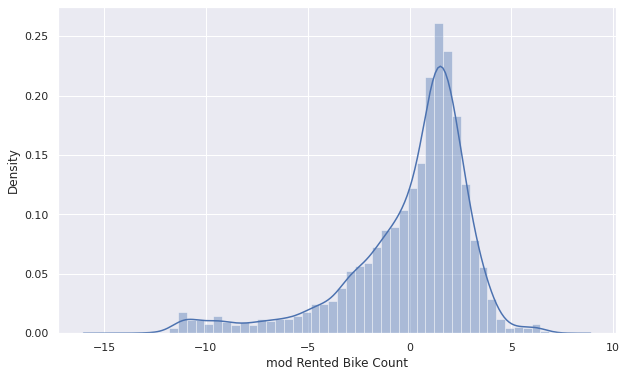

In [70]:
sns.distplot(y_resi)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


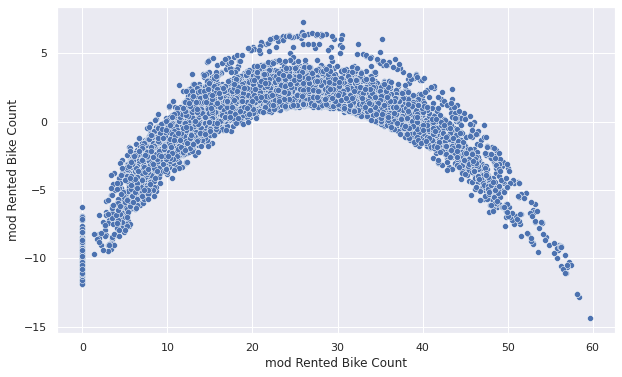

In [71]:
sns.scatterplot(y_train,y_resi)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


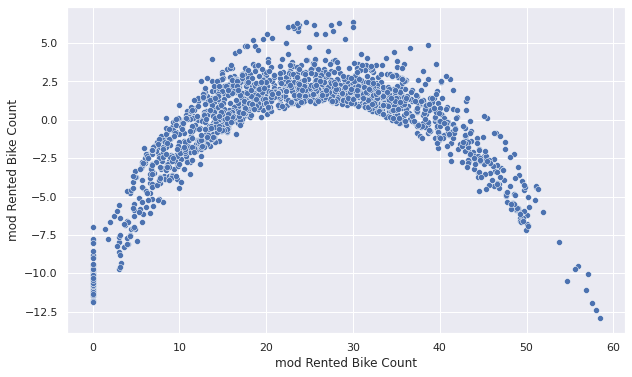

In [72]:
sns.scatterplot(y_test,y_test-y_pre_test)

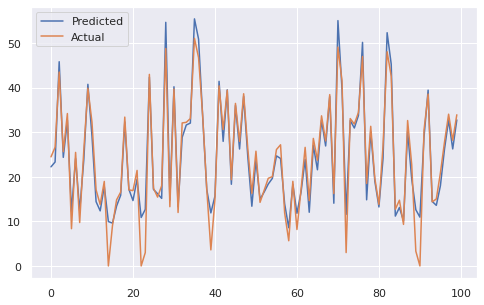

In [73]:
plt.figure(figsize=(8,5))
plt.plot((y_pre_test[:100]))
plt.plot(np.array((y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.show()

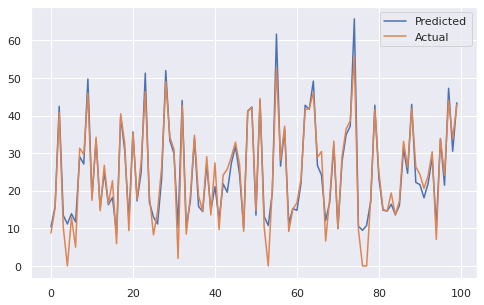

In [74]:
plt.figure(figsize=(8,5))
plt.plot((y_pre_train[:100]))
plt.plot(np.array((y_train[:100])))
plt.legend(["Predicted","Actual"])
plt.show()

In [79]:
from sklearn import metrics
import numpy as np
print('MSE',metrics.mean_squared_error([y_train], [y_pre_train]))
print('MAE',metrics.median_absolute_error([y_train],[y_pre_train]))
print('RMSE',np.sqrt(metrics.mean_squared_error([y_train],[y_pre_train])))

MSE 9.811694673501389
MAE 2.300780501620733
RMSE 3.132362474794606


In [80]:

print('MSE',metrics.mean_squared_error([y_test], [y_pre_test]))
print('MAE',metrics.median_absolute_error([y_test],[y_pre_test]))
print('RMSE',np.sqrt(metrics.mean_squared_error([y_test],[y_pre_test])))

MSE 10.321637206157769
MAE 2.3491110439997875
RMSE 3.2127304907442467


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
>>> poly = PolynomialFeatures(3)
>>> poly.fit_transform(x_train)
>>> poly.fit_transform(x_test)

array([[1.        , 0.05033746, 0.66959578, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.05568054, 0.19332162, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.58211474, 0.51845343, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.1363892 , 0.34094903, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.04555681, 0.39015817, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.35292463, 0.46924429, ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
Regress=LinearRegression()
Regress.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Regress.coef_

array([ 6.57202269e+01, -1.52888509e+00, -1.57395516e+12, -1.57395516e+12,
       -1.57395516e+12, -1.57395516e+12, -1.57395516e+12, -1.57395516e+12,
       -1.57395516e+12, -1.57395516e+12, -1.57395516e+12, -1.57395516e+12,
       -1.57395516e+12, -1.57395516e+12, -1.57395516e+12, -1.57395516e+12,
       -1.57395516e+12, -1.57395516e+12, -1.57395516e+12, -1.57395516e+12,
       -1.57395516e+12, -1.57395516e+12, -1.57395516e+12, -1.57395516e+12,
       -1.57395516e+12, -1.57395516e+12, -1.34701334e+13, -1.34701334e+13,
       -1.34701334e+13, -1.34701334e+13,  3.54320950e+12,  3.54320950e+12])

In [ ]:
x_train

array([[0.0795838 , 0.40070299, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.34392576, 0.60632689, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.30174353, 0.7029877 , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.17379078, 0.42003515, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.18616423, 0.73637961, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.3996063 , 0.62565905, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
Regress.intercept_

11500879103052.723

In [ ]:
y_pre_train=Regress.predict(x_train)
y_pre_test=Regress.predict(x_test)

In [ ]:
r2_score(y_train,y_pre_train)

0.9352595169047531

In [ ]:
r2_score(y_test,y_pre_test)

0.9391611587142966

As the linear plot is giving us pattern of residuals and indicating for polynomial regression
we will discard linear applying other


In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
from sklearn.preprocessing import MinMaxScaler

In [82]:
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor()

In [83]:
gbm.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [84]:
gbm.score(x_train,y_train)

0.9999313629216158

In [85]:
gbm.score(x_test,y_test)

0.9999215544211638

In [86]:
y_pred_train=gbm.predict(x_train)
y_pred_test=gbm.predict(x_test)

In [87]:
params={'n_estimators':[100,110,90]}

In [88]:
from sklearn.model_selection import GridSearchCV
gd=GridSearchCV(estimator=gbm,param_grid=params,cv=5,verbose=5,n_jobs=-1)

In [89]:
gd.fit(x_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    9.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [90]:
gd.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=110,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [91]:
gf=gd.estimator

In [92]:
gf.score(x_train,y_train)

0.9999313629216158

In [93]:
gf.score(x_test,y_test)

0.9999215544211638

In [94]:
y_pred_train=gf.predict(x_train)
y_pred_test=gf.predict(x_test)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


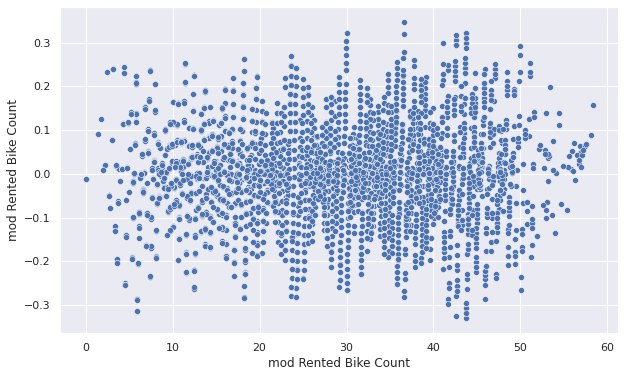

In [95]:
sns.scatterplot(y_train,y_train-y_pred_train)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


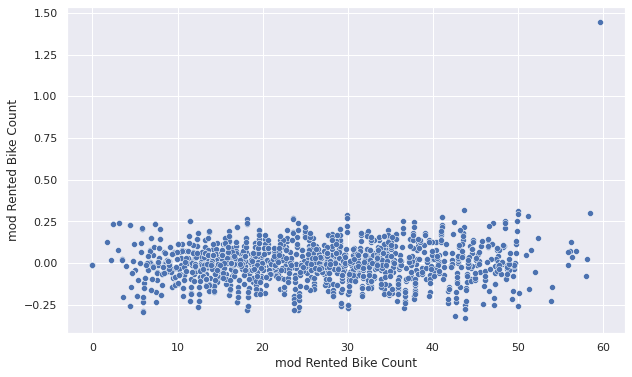

In [96]:
sns.scatterplot(y_test,y_test-y_pred_test)

In [97]:

print('MSE',metrics.mean_squared_error([y_train], [y_pre_train]))
print('MAE',metrics.median_absolute_error([y_train],[y_pre_train]))
print('RMSE',np.sqrt(metrics.mean_squared_error([y_train],[y_pre_train])))

MSE 294.01231089837995
MAE 13.723396945630768
RMSE 17.146787188811203


We will sel

In [98]:

print('MSE',metrics.mean_squared_error([y_test], [y_pre_test]))
print('MAE',metrics.median_absolute_error([y_test],[y_pre_test]))
print('RMSE',np.sqrt(metrics.mean_squared_error([y_test],[y_pre_test])))

MSE 304.23766037362685
MAE 13.956198374006119
RMSE 17.442409821284066
